In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\Intership\Task -4\cleaned.csv")

print(df.info())
df.dropna(inplace=True) 

# Convert columns to appropriate types if needed
df['Accident_severity'] = df['Accident_severity'].astype('category')
df['Weather_conditions'] = df['Weather_conditions'].astype('category')
df['Light_conditions'] = df['Light_conditions'].astype('category')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

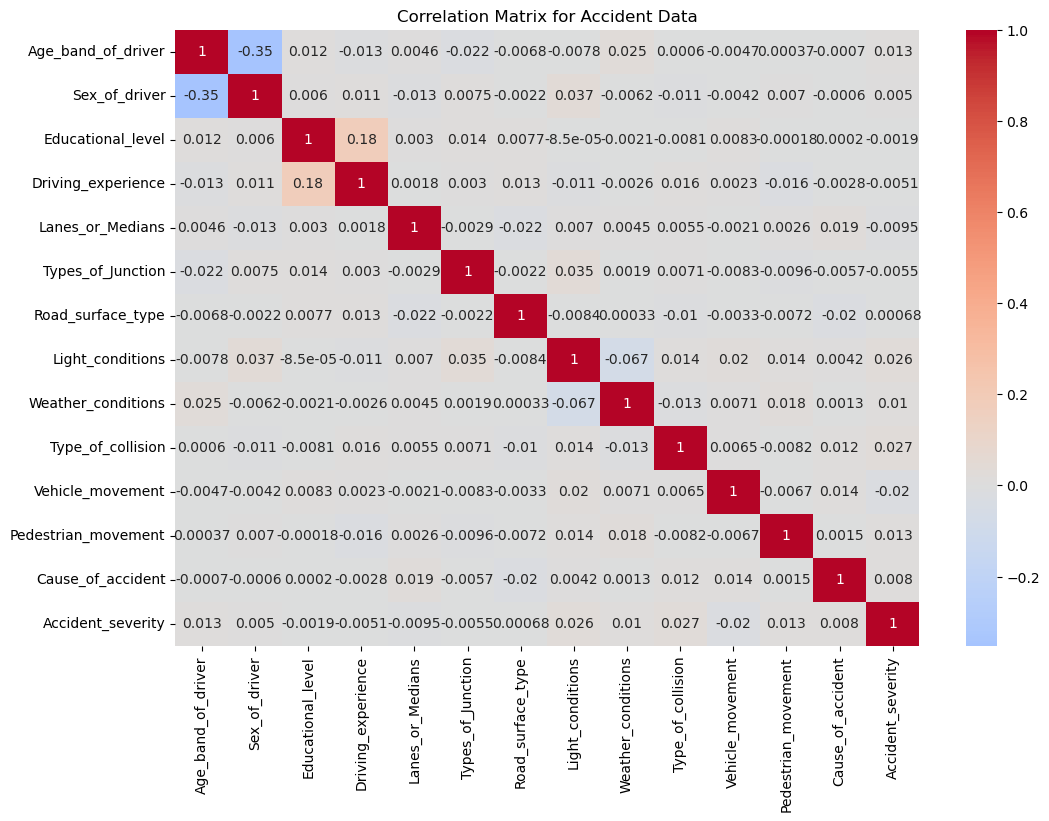

In [2]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical variables
le = LabelEncoder()
for col in ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 
            'Driving_experience', 'Lanes_or_Medians', 'Types_of_Junction',
            'Road_surface_type', 'Light_conditions', 'Weather_conditions', 
            'Type_of_collision', 'Vehicle_movement', 'Pedestrian_movement', 
            'Cause_of_accident', 'Accident_severity']:
    df[col] = le.fit_transform(df[col])

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix for Accident Data")
plt.show()


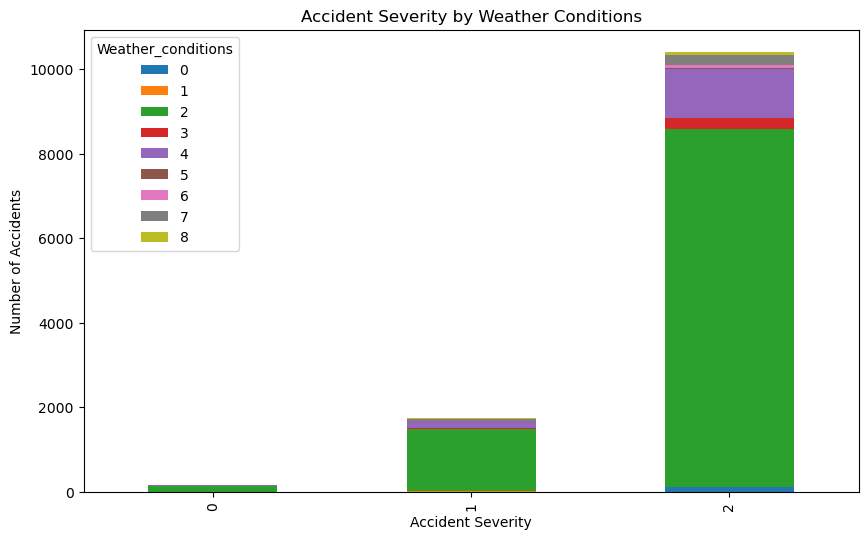

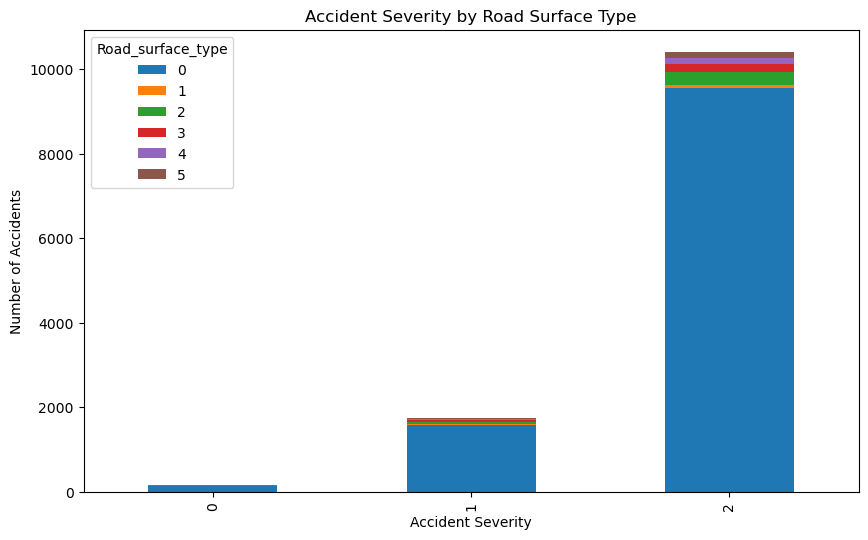

In [3]:
# Accident severity vs. Weather conditions
severity_weather = pd.crosstab(df['Accident_severity'], df['Weather_conditions'])
severity_weather.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Accident Severity by Weather Conditions")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.show()

# Accident severity vs. Road surface type
severity_road_surface = pd.crosstab(df['Accident_severity'], df['Road_surface_type'])
severity_road_surface.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Accident Severity by Road Surface Type")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.show()


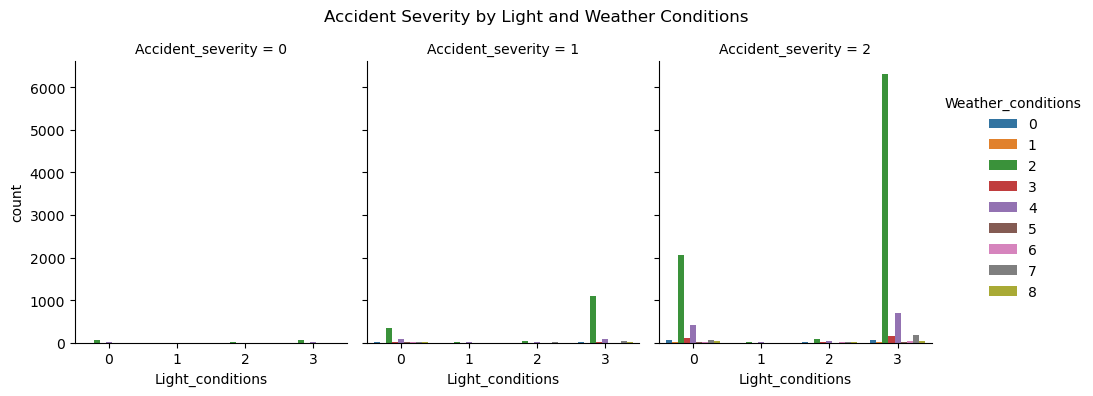

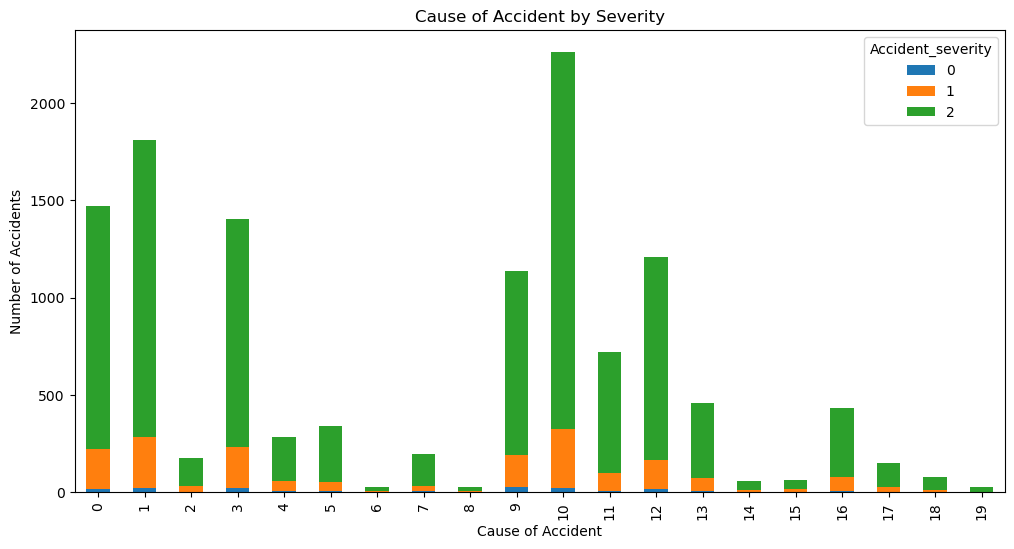

In [4]:
# Accident severity, Light conditions, and Weather conditions
sns.catplot(x='Light_conditions', hue='Weather_conditions', col='Accident_severity', 
            data=df, kind='count', height=4, aspect=0.8)
plt.subplots_adjust(top=0.85)
plt.suptitle('Accident Severity by Light and Weather Conditions')
plt.show()

# Accident cause vs. severity
cause_severity = pd.crosstab(df['Cause_of_accident'], df['Accident_severity'])
cause_severity.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Cause of Accident by Severity")
plt.xlabel("Cause of Accident")
plt.ylabel("Number of Accidents")
plt.show()


In [ ]:
==